In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# function for plotting bar graph
def plot_x_y(tup):
    import matplotlib.pyplot as plt; plt.rcdefaults()
    import numpy as np
    import matplotlib.pyplot as plt

    objects = [i[0] for i in tup]
    y_pos = np.arange(len(objects))
    performance = [i[1] for i in tup]
    plt.bar(y_pos, performance, align='center', alpha=0.5, color='blue')

    plt.xticks(y_pos, objects, rotation=45, size=10, va='top', ha='right')
    plt.ylabel('Importance')
    plt.title('Features')

    return plt

# Get the data

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
housing = pd.read_csv("housing.csv")

Saving figure median_house_value_histogram_plots


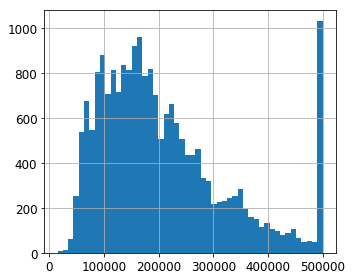

In [4]:
housing['median_house_value'].hist(bins=50, figsize=(5,4))
save_fig("median_house_value_histogram_plots")
plt.show()

In [5]:
# show corelations with median house value
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Perform a stratified Train Test split

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64


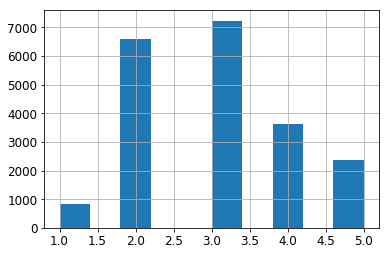

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
print(housing["income_cat"].value_counts())
housing["income_cat"].hist()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, list(housing["income_cat"])):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [8]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [9]:
housing = strat_train_set.copy()

Saving figure california_housing_prices_plot


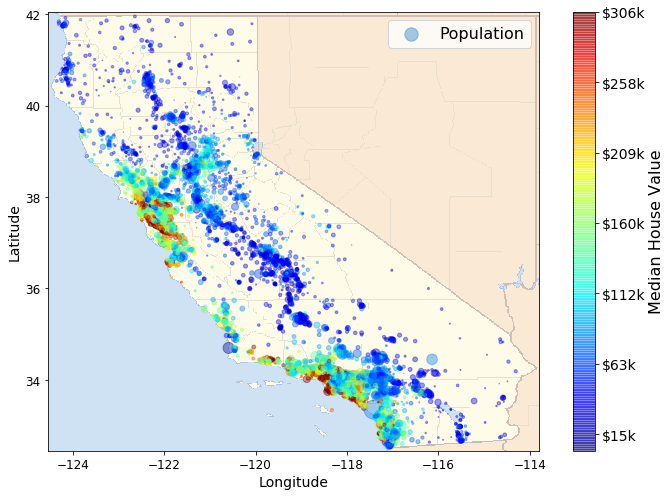

In [10]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/california.png')

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

Saving figure income_vs_house_value_scatterplot


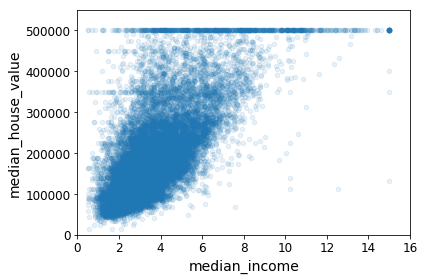

In [11]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## Add extra features

In [12]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

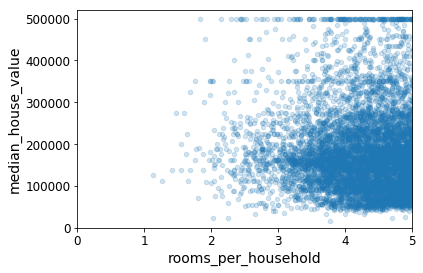

In [13]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

## Look at ocean proximity

                          sum  count   median_value  houses_amount  \
ocean_proximity                                                      
<1H OCEAN        1.752212e+09   7276  240820.716465      3764687.0   
INLAND           6.595111e+08   5263  125310.872316      2494116.0   
ISLAND           7.022000e+05      2  351100.000000          604.0   
NEAR BAY         4.778937e+08   1847  258740.476448       886626.0   
NEAR OCEAN       5.275156e+08   2124  248359.495763      1061428.0   

                 total_tile_value  
ocean_proximity                    
<1H OCEAN            9.066146e+11  
INLAND               3.125399e+11  
ISLAND               2.120644e+08  
NEAR BAY             2.294060e+11  
NEAR OCEAN           2.636157e+11  


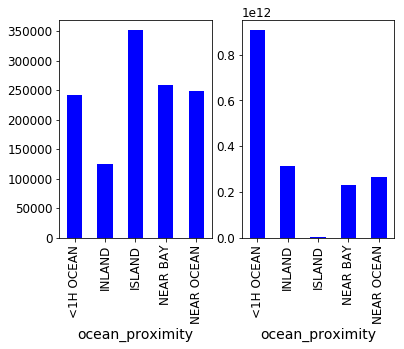

In [14]:
#get sum of all medians house values
#get sum of all households
#get count of data points per ocean ocean tile
import pandas as pd
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
pd.options.mode.chained_assignment = None
columns = dict.fromkeys(('median_house_value', 'households'), ['sum'])
housing_totals = housing.groupby(["ocean_proximity"]).agg(columns)
housing_totals["count"] = housing["ocean_proximity"].value_counts()
#get average median house price per ocean tile -> shows value per house basis
new_h = housing_totals["median_house_value"]
new_h["count"] = housing_totals["count"]
new_h["median_value"] = new_h["sum"] / new_h["count"]
#multiply amount of houses to get value of land value
new_h["houses_amount"] = housing_totals["households"]
new_h["total_tile_value"] = new_h["median_value"] * new_h["houses_amount"]
print(new_h)
new_h["median_value"].plot(kind="bar", ax=axs[0], color='blue')
new_h["total_tile_value"].plot(kind="bar", ax=axs[1], color='blue')

# Prepare the data for Machine Learning algorithms

In [15]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


## Fill out missing values

In [16]:
from sklearn.impute import SimpleImputer 

#fill out missing values 
housing_num = housing.drop('ocean_proximity', axis=1)
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
X = imputer.transform(housing_num)

In [17]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [18]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## preprocessing ocean proximity

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# ordinal encoding
housing_cat = housing[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# one-hot encoding
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
ocean_prox_categories = list(ordinal_encoder.categories_[0])

## Add extra atributes

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])

## Above transformations using pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

# Train a model

In [ ]:
c = housing_prepared.dot(np.transpose(housing_prepared))


## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# fit the model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# predict
housing_predictions = lin_reg.predict(housing_prepared)

# evaluate
lin_mse = mean_squared_error(housing_labels, housing_predictions)
print('R squared : ', lin_reg.score(housing_prepared, housing_labels))
print('MSE : ', lin_mse)
print('RMSE : ', np.sqrt(lin_mse))
print('MAE : ', mean_absolute_error(housing_labels, housing_predictions))




R squared :  0.6481624842804428
MSE :  4709829587.97112
RMSE :  68628.19819848922
MAE :  49439.89599001898


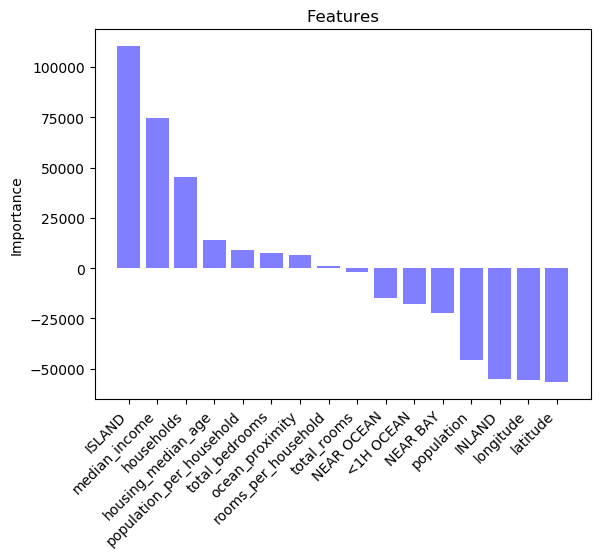

In [ ]:
# Plot linear regression coefficients
columns = list(housing_extra_attribs.columns) + ocean_prox_categories
columns_coeffs_touple = sorted(zip(columns, lin_reg.coef_), key = lambda x:x[1], reverse=True)
plot_x_y(columns_coeffs_touple).show()

## Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# fit the model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

# predict
housing_predictions = forest_reg.predict(housing_prepared)

# evaluate
forest_mse = mean_squared_error(housing_labels, housing_predictions)
print('MSE : ', forest_mse)
print('RMSE : ', np.sqrt(forest_mse))
print('MAE : ', mean_absolute_error(housing_labels, housing_predictions))

In [ ]:
# feature importances

columns = list(housing_extra_attribs.columns) + ocean_prox_categories
columns_importance_touple = sorted(zip(columns, forest_reg.feature_importances_), key = lambda x:x[1], reverse=True)
plot_x_y(columns_importance_touple).show()

And thats that !